In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [81]:
df= pd.read_csv('C:/Users/rukhsar.p/Downloads/Mall_Customers.csv', index_col=0, header=0)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [83]:
df.describe(include="all")

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [84]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [131]:
df.Genre = df.Genre.map({"Female":0, "Male":1})

##Subsetting dataframe and Converting dataframe to arrays

In [132]:
X = df.values[:, [0,1,2,3]]
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

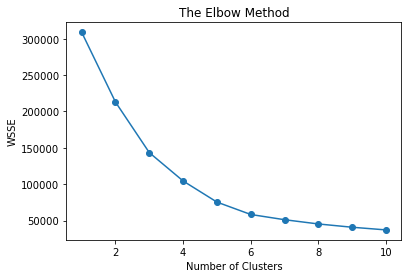

In [133]:
from sklearn.cluster import KMeans

wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
    
plt.plot(range(1,11), wsse)
plt.scatter(range(1,11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')
plt.show()

In [134]:
print(wsse)

[308862.06, 212889.442455243, 143391.59236035674, 104414.67534220166, 75399.61541401484, 58348.64136331505, 51167.19736842105, 45324.85021951262, 40811.455768566826, 37141.48254409704]


In [135]:
kmeans = KMeans(n_clusters = 5, random_state=10)
Y_pred = kmeans.fit_predict(X)

In [136]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [137]:
kmeans.n_iter_

7

In [138]:
df['Cluster'] = Y_pred
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,0
3,0,20,16,6,3
4,0,23,16,77,0
5,0,31,17,40,3
...,...,...,...,...,...
196,0,35,120,79,2
197,0,45,126,28,4
198,1,32,126,74,2


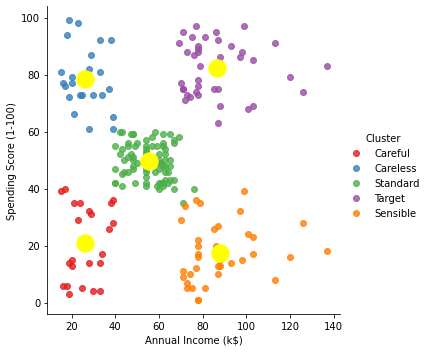

In [144]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', fit_reg=False, #No regression line
          hue='Cluster', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s=300, c='yellow')#[:1]can be change based on the index of X and Y
plt.show()

In [140]:
df['Cluster'] = df.Cluster.map({0:"Careless", 
                                1:"Standard", 
                                2:"Target", 
                                3:"Careful", 
                                4:"Sensible"})

In [141]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,1,19,15,39,Careful
2,1,21,15,81,Careless
3,0,20,16,6,Careful
4,0,23,16,77,Careless
5,0,31,17,40,Careful
...,...,...,...,...,...
196,0,35,120,79,Target
197,0,45,126,28,Sensible
198,1,32,126,74,Target


In [142]:
dff = df[df.Cluster == 'Target']

In [145]:
dff.shape

(39, 5)

In [146]:
dff.to_csv('C:/Users/rukhsar.p/Downloads/result.csv')